In [17]:
import pandas as pd
import os

data_directory = "yellow_taxi_datasets"
csv_files = [f for f in os.listdir(data_directory) if f.endswith(".csv")]

df_list = [pd.read_csv(os.path.join(data_directory, f)) for f in csv_files]
df = pd.concat(df_list, ignore_index=True)

# Feature Engineering

In [18]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [19]:
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [20]:
df = df[(df['trip_duration'] > 0) & (df['trip_duration'] < 180)]
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] < 100)]

In [21]:
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day'] = df['tpep_pickup_datetime'].dt.day
df['weekday'] = df['tpep_pickup_datetime'].dt.dayofweek
df['month'] = df['tpep_pickup_datetime'].dt.month
df['date'] = df['tpep_pickup_datetime'].dt.date

In [22]:
df.rename(columns={
    'pickup_latitude': 'pickup_lat',
    'pickup_longitude': 'pickup_lon',
    'dropoff_latitude': 'dropoff_lat',
    'dropoff_longitude': 'dropoff_lon'
}, inplace=True)

In [23]:
df.drop(columns=['RatecodeID'], inplace=True)

# Data Visualizations

## Trip Duration vs. Trip Distance

/var/folders/f7/2prvt6bn1c16021g9h5n59200000gn/T/ipykernel_38413/1924647911.py:17: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


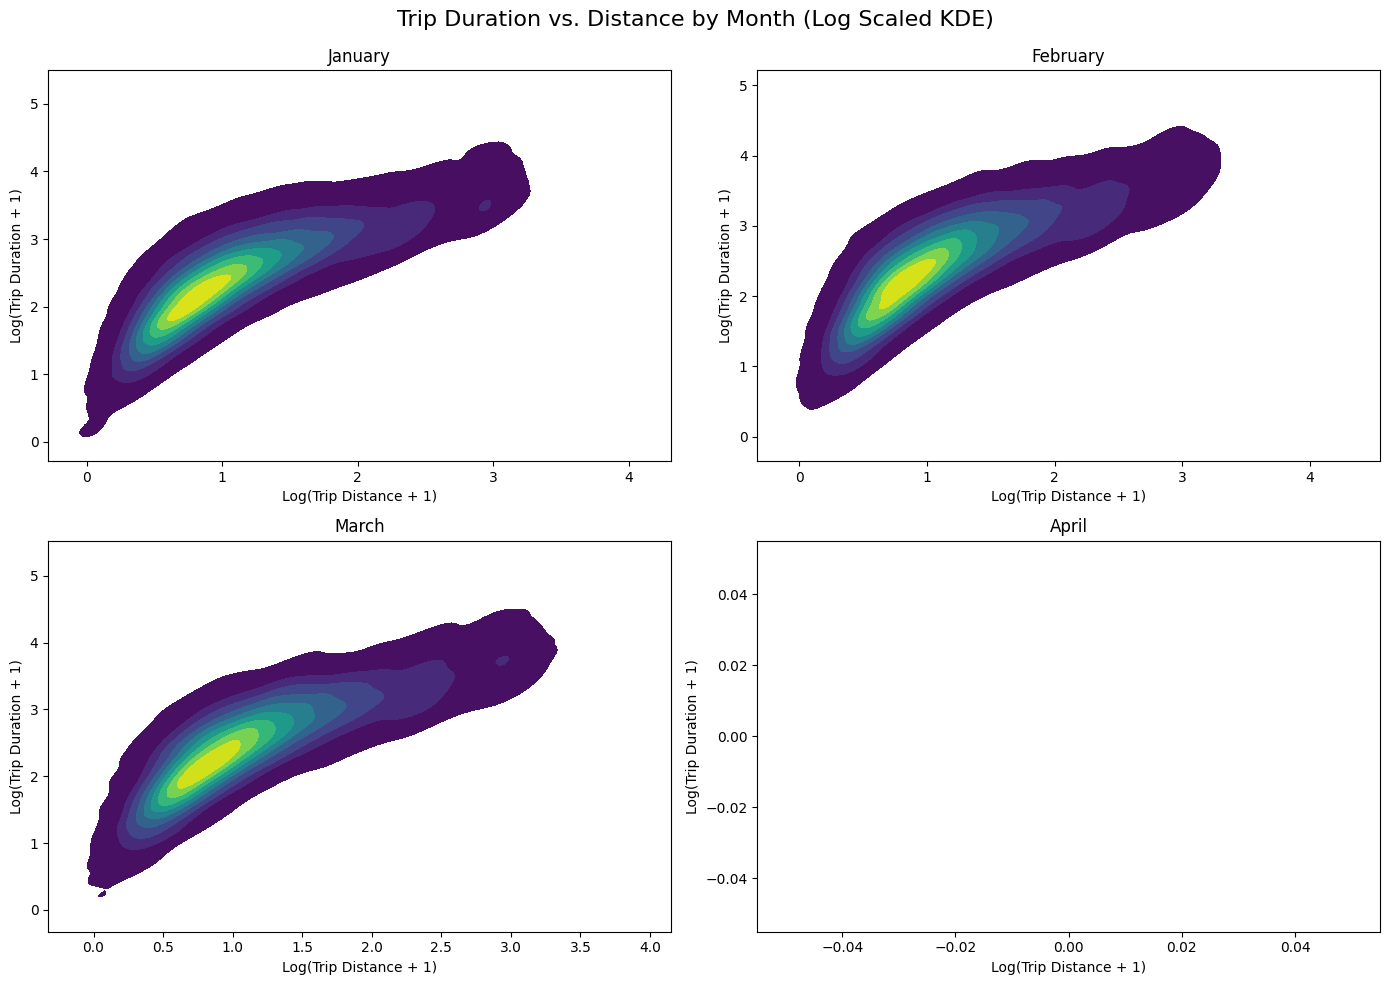

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

available_months = sorted(sample_df['month'].unique())
titles = {1: "January", 2: "February", 3: "March"}

fig, axes = plt.subplots(1, len(available_months), figsize=(6 * len(available_months), 6))

if len(available_months) == 1:
    axes = [axes]

for ax, month in zip(axes, available_months):
    month_df = sample_df[sample_df['month'] == month]
    sns.kdeplot(
        data=month_df,
        x="log_distance", y="log_duration",
        cmap="viridis", fill=True, thresh=0.01, ax=ax
    )
    ax.set_title(f"{titles.get(month, f'Month {month}')} ({len(month_df):,} trips)")
    ax.set_xlabel("Log(Trip Distance + 1)")
    ax.set_ylabel("Log(Trip Duration + 1)")

plt.suptitle("Trip Duration vs. Distance by Month (Log Scaled KDE)", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()